# Data Cleaning

In this notebook, I will be showing the source code for the omission of measurements

## Importing packages and scripts

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from cleaning import *

Inside `cleaning.py`, there are three functions:

1. `dropped_pts` returns the omitted measurements and their corresponding timestamps
2. `remove_rows` returns a boolean series that is to be used as boolean index to omit the measurements
3. `clean` returns two Pandas Series object: the remaining measurements, and the removed measurements

In [30]:
df = pd.read_csv(r'/home/jovyan/complete_data.csv', index_col = 0, parse_dates =  True)
pm_col = [' PM10 (µg/m^3)', ' PM2.5 (µg/m^3)', ' PM1 (µg/m^3)']
pm = df[pm_col]
pm_newyear = pm['2019-12-31 12':'2020-01-01 06']
df_ny = df['2019-12-31 12':'2020-01-01 06']

## Summary statistics before discarding measurements

In [46]:
#descriptive stats before dropping measurements
pm.dropna().describe()

,PM10 (µg/m^3),PM2.5 (µg/m^3),PM1 (µg/m^3)
count,248171.000000,248171.000000,248171.000000
mean,16.277031,13.120716,11.315146
std,22.290424,11.080843,9.747115
min,0.300000,0.300000,0.300000
25%,7.200000,6.000000,4.900000
50%,12.500000,10.100000,8.600000
75%,20.600000,16.600000,14.400000
max,7910.000000,1006.700000,237.200000


## Summary Stats for the New Year Period

In [27]:
#time difference
pd.DataFrame((pm_newyear.index[1:] - pm_newyear.index[:-1])/(np.timedelta64(1,'m'))).describe()

,0
count,1139.000000
mean,0.999985
std,0.012547
min,0.983333
25%,0.983333
50%,1.000000
75%,1.016667
max,1.016667


In [45]:
#descriptive stats during new year
pm_newyear.describe()

,PM10 (µg/m^3),PM2.5 (µg/m^3),PM1 (µg/m^3)
count,1140.000000,1140.000000,1140.000000
mean,35.706053,33.615175,31.257632
std,33.352431,32.384944,31.004209
min,1.700000,1.700000,1.400000
25%,6.400000,5.500000,4.400000
50%,24.550000,21.400000,18.650000
75%,57.700000,54.825000,51.125000
max,142.500000,132.600000,126.700000


In [24]:
pm_newyear.describe().style.to_latex()

'\\begin{tabular}{lrrr}\n &  PM10 (µg/m^3) &  PM2.5 (µg/m^3) &  PM1 (µg/m^3) \\\\\ncount & 1140.000000 & 1140.000000 & 1140.000000 \\\\\nmean & 35.706053 & 33.615175 & 31.257632 \\\\\nstd & 33.352431 & 32.384944 & 31.004209 \\\\\nmin & 1.700000 & 1.700000 & 1.400000 \\\\\n25% & 6.400000 & 5.500000 & 4.400000 \\\\\n50% & 24.550000 & 21.400000 & 18.650000 \\\\\n75% & 57.700000 & 54.825000 & 51.125000 \\\\\nmax & 142.500000 & 132.600000 & 126.700000 \\\\\n\\end{tabular}\n'

## Maximum and Minimum Rate of Change during New Year

In [10]:
pm10_ny_minroc,pm10_ny_maxroc  = maxmin_roc(pm, ' PM10 (µg/m^3)')
pm25_ny_minroc,pm25_ny_maxroc  = maxmin_roc(pm, ' PM2.5 (µg/m^3)')
pm1_ny_minroc,pm1_ny_maxroc  = maxmin_roc(pm, ' PM1 (µg/m^3)')

In [11]:
pm10_ny_minroc,pm10_ny_maxroc

(-41.400000000000006, 21.599999999999994)

In [12]:
pm25_ny_minroc,pm25_ny_maxroc

(-42.50000000000001, 24.800000000000004)

In [13]:
pm1_ny_minroc,pm1_ny_maxroc

(-41.10000000000001, 22.299999999999997)

## Discarding measurements

In [31]:
#omitting measurements
pm10_clean, pm10_removed = clean(pm, ' PM10 (µg/m^3)')
pm25_clean, pm25_removed = clean(pm, ' PM2.5 (µg/m^3)')
pm1_clean, pm1_removed = clean(pm, ' PM1 (µg/m^3)')

## Summary Statistics for discarded measurements

In [15]:
pm10_removed.describe()

count     226.000000
mean      262.330088
std       545.923441
min        17.900000
25%       145.000000
50%       170.750000
75%       234.425000
max      7910.000000
Name:  PM10 (µg/m^3), dtype: float64

In [16]:
pm25_removed.describe()

count      18.000000
mean      253.850000
std       208.450486
min       131.200000
25%       152.925000
50%       186.300000
75%       224.650000
max      1006.700000
Name:  PM2.5 (µg/m^3), dtype: float64

In [17]:
pm1_removed.describe()

count      2.000000
mean     184.650000
std       74.316923
min      132.100000
25%      158.375000
50%      184.650000
75%      210.925000
max      237.200000
Name:  PM1 (µg/m^3), dtype: float64

## Summary statistics for remaining measurements

In [18]:
pm10_clean.describe()

count    247945.000000
mean         16.052755
std          13.100700
min           0.300000
25%           7.200000
50%          12.500000
75%          20.600000
max         213.100000
Name:  PM10 (µg/m^3), dtype: float64

In [19]:
pm25_clean.describe()

count    248153.000000
mean         13.103255
std          10.752370
min           0.300000
25%           6.000000
50%          10.100000
75%          16.600000
max         145.600000
Name:  PM2.5 (µg/m^3), dtype: float64

In [20]:
pm1_clean.describe()

count    248169.000000
mean         11.313749
std           9.733583
min           0.300000
25%           4.900000
50%           8.600000
75%          14.400000
max         141.200000
Name:  PM1 (µg/m^3), dtype: float64

## Sanity Check

As a sanity check, if we add the number of measurents left and removed, it should equal how many measurements there are before removing any measurement.

In [27]:
pm10_clean.shape[0]+ pm10_removed.shape[0] == pm[' PM10 (µg/m^3)'].dropna().shape[0]

True

In [28]:
pm25_clean.shape[0]+ pm25_removed.shape[0] == pm[' PM2.5 (µg/m^3)'].dropna().shape[0]

True

In [29]:
pm1_clean.shape[0]+ pm1_removed.shape[0] == pm[' PM1 (µg/m^3)'].dropna().shape[0]

True

## Exporting as CSV

In [30]:
#uncomment this if you want to download again
pm10_clean.to_csv(r'/cxnfs/Mark/Data/cleaned_data/pm10_cleaned.csv')
pm10_removed.to_csv(r'/cxnfs/Mark/Data/cleaned_data/pm10_omitted.csv')
pm25_clean.to_csv(r'/cxnfs/Mark/Data/cleaned_data/pm25_cleaned.csv')
pm25_removed.to_csv(r'/cxnfs/Mark/Data/cleaned_data/pm25_omitted.csv')
pm1_clean.to_csv(r'/cxnfs/Mark/Data/cleaned_data/pm1_cleaned.csv')
pm1_removed.to_csv(r'/cxnfs/Mark/Data/cleaned_data/pm1_omitted.csv')

## Figures relevant to discarding of measurements

### Meteorological conditions during New Year

<Axes: >

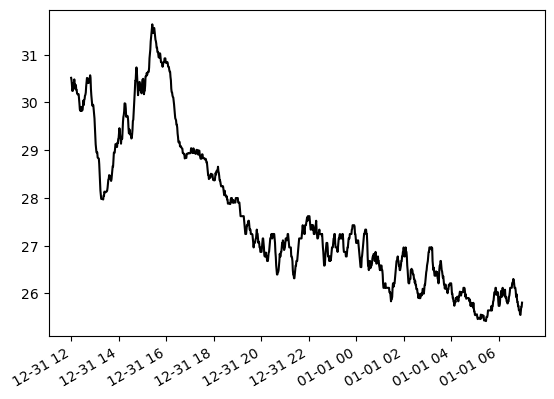

In [56]:
df_ny[' Temp. (deg C)'].plot(color = 'black')

<Axes: >

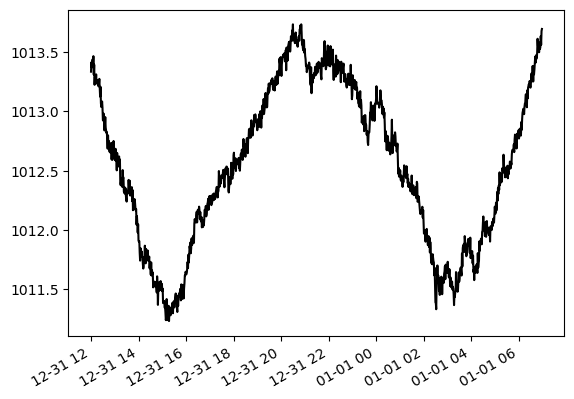

In [57]:
df_ny[' Pressure (HPasc)'].plot(color = 'black')

<Axes: >

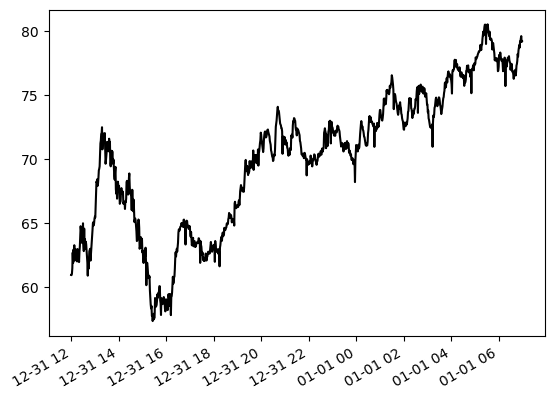

In [58]:

df_ny[' Humidity (%)'].plot(color = 'black')

In [ ]:
df_ny[' Windspeed (m/s)'].plot(color = 'black', marker= '.')

<Axes: >

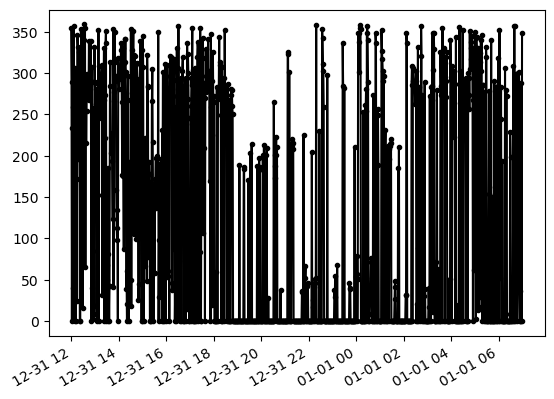

In [65]:

df_ny[' WindDirect (Degr)'].plot(color = 'black', marker= '.')



### Time Series plot of PM10 during New Year

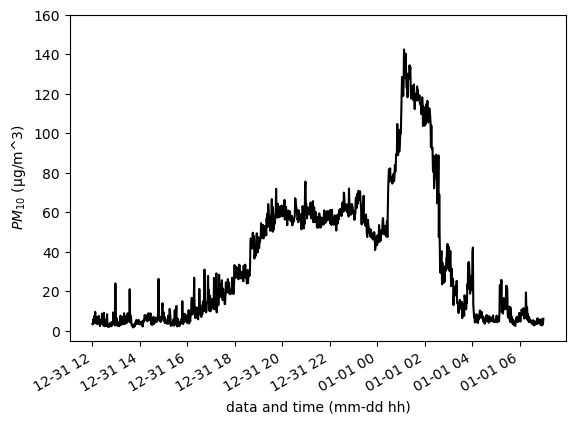

In [43]:
pm_newyear.iloc[:,0].plot(color = 'black')
plt.ylabel(' $PM_{10}$ (µg/m^3)')
plt.xlabel('data and time (mm-dd hh)')
plt.yticks(np.arange(0, 180, 20))
plt.show()

### Time Series plot of PM2.5 during New Year

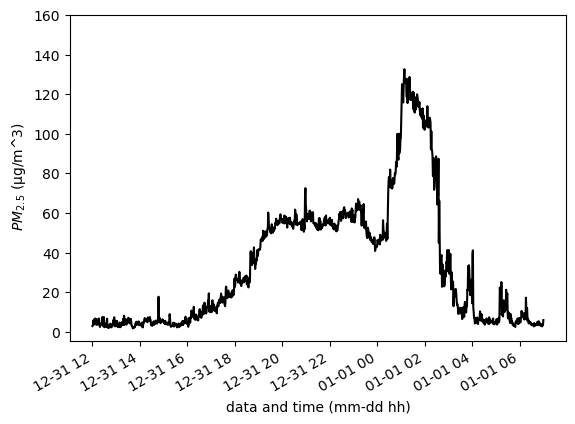

In [44]:
pm_newyear.iloc[:,1].plot(color = 'black')
plt.ylabel(' $PM_{2.5}$ (µg/m^3)')
plt.xlabel('data and time (mm-dd hh)')
plt.yticks(np.arange(0, 180, 20))
plt.show()

### Time Series plot of PM1 during New Year

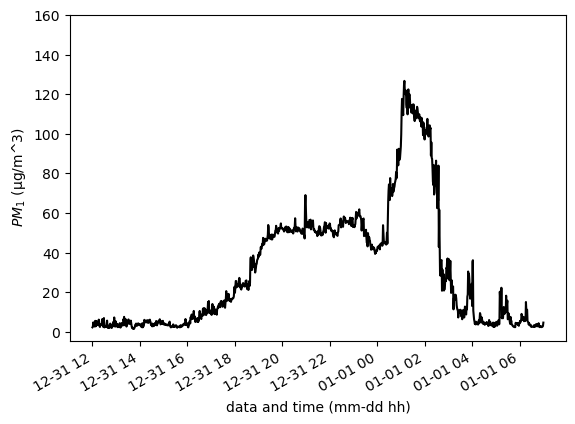

In [40]:
pm_newyear.iloc[:,2].plot(color = 'black')
plt.ylabel(' $PM_{1}$ (µg/m^3)')
plt.xlabel('data and time (mm-dd hh)')
plt.yticks(np.arange(0, 180, 20))
plt.show()

### Global maximum PM10 value

Text(0.5, 0, 'day and time (dd hh:mm)')

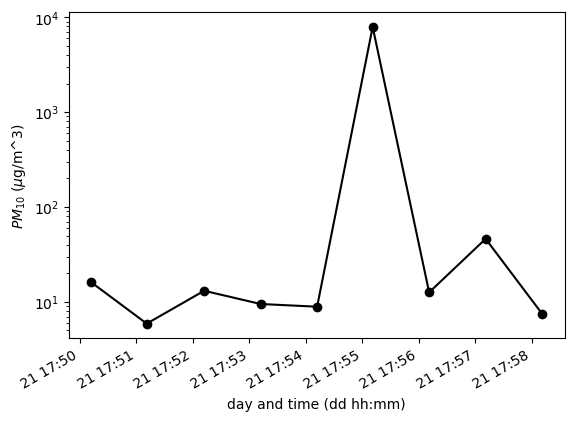

In [39]:
#global maximum PM10 value

df['2020-01-21 17:50:11':'2020-01-21 17:59:11'][' PM10 (µg/m^3)'].plot(marker = 'o', color = 'black')
plt.yscale('log')
plt.ylabel('$PM_{10}$ ($\mu$g/m^3)')
plt.xlabel(r'day and time (dd hh:mm)')
# plt.xticks(plt.get_xticks())
# plt.xticklabels(['17:'+str(sec) for sec in range(50,60)])